# Segmentation

## Imports

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import PIL
import cv2

import sys
sys.path.append('../DataLoader')

from Dataset import Dataset
from helpers import imshow

## Creation of a Dataset container

In [13]:
DATASET_PATH= '../Data'
dp = Dataset(path=DATASET_PATH)[0]

## Segmentation visualization

In [14]:
def show_segmap(img: np.ndarray):
    imshow((img / 256).astype('uint8'))

Text(0.5, 1.0, 'Segmentation map')

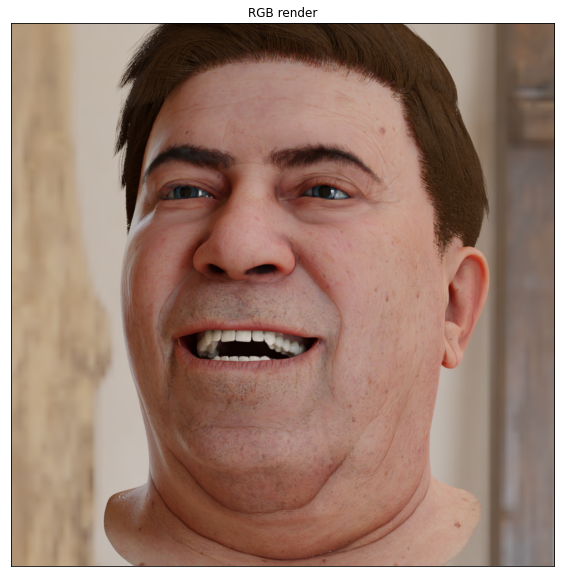

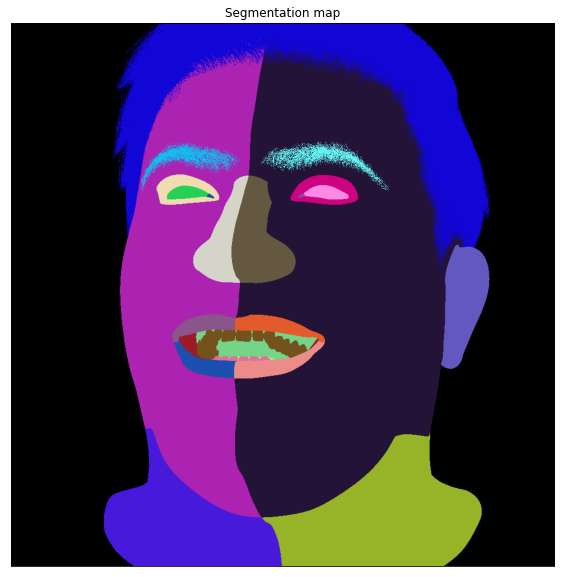

In [15]:
imshow(dp.rgb_img)
plt.title('RGB render')

show_segmap(dp.semantic_seg_map)
plt.title('Segmentation map')

## Background replacement
We'll remove the original background from the image using the segmentation map and replace it with a new random background

Let's load the new background and crop it to the render size

In [16]:
random_background = plt.imread('../Images/random_background.jpg')
random_background = PIL.Image.fromarray(random_background).crop(box=(0, 0, dp.rgb_img.shape[0], dp.rgb_img.shape[1]))
random_background = np.asarray(random_background)

Create a background mask using the segementation colormap

Text(0.5, 1.0, 'Background mask')

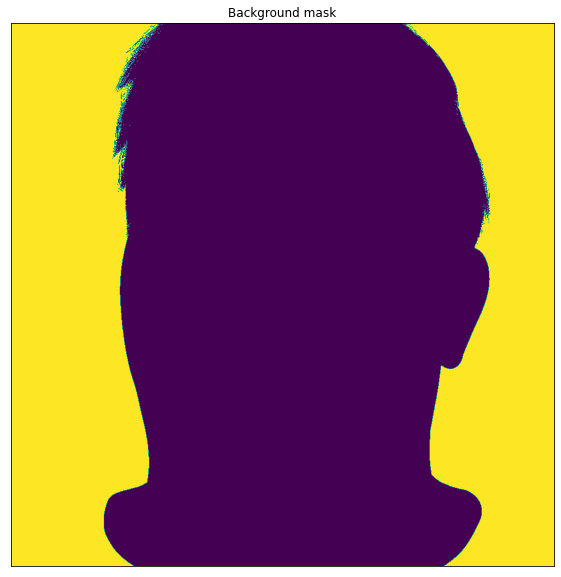

In [17]:
background_mask = np.logical_and.reduce(dp.semantic_seg_map == dp.semantic_seg_colormap.background, axis=2)
imshow(background_mask.astype('float'))
plt.title('Background mask')

Now replace the background pixels from the render with the new background's pixels

Text(0.5, 1.0, 'Rgb render with the new background')

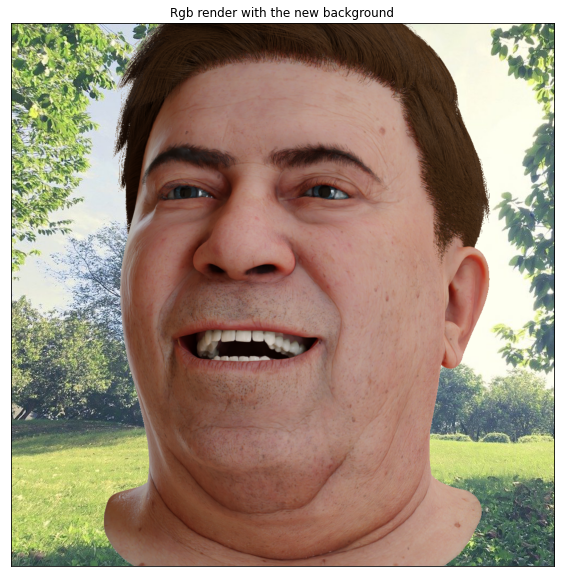

In [18]:
rgb_new_background = dp.rgb_img.copy()
rgb_new_background[background_mask] = np.asarray(random_background)[background_mask]

imshow(rgb_new_background)
plt.title('Rgb render with the new background')

## Segment extraction
This part explains how to extract different segments from the segmentation map


A segment's color map can be accessed using:

In [19]:
print(f'Left eyebrow segment RGB code = {dp.semantic_seg_colormap.human.head.eyebrow.left}')

Left eyebrow segment RGB code = [25890 62289 62077]


Let's extract the nose from the picture using the segmentation map. <br>
To perform this task, we have to unify the nose's left and right segments into a single mask...

In [20]:
nose_colormap = dp.semantic_seg_colormap.human.head.nose
seg_mask = np.logical_or(dp.semantic_seg_map == nose_colormap.left, dp.semantic_seg_map == nose_colormap.right).all(axis=-1)
seg_mask = np.broadcast_to(seg_mask[..., np.newaxis], dp.rgb_img.shape)

... and apply the mask to the render

Text(0.5, 1.0, 'Nose segmentation')

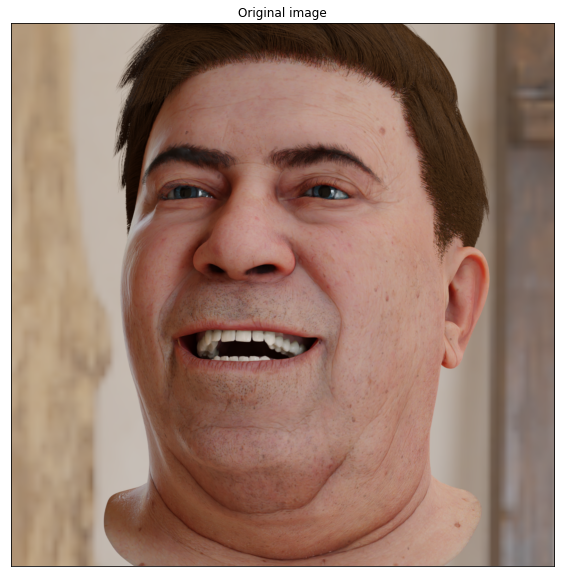

<Figure size 432x288 with 0 Axes>

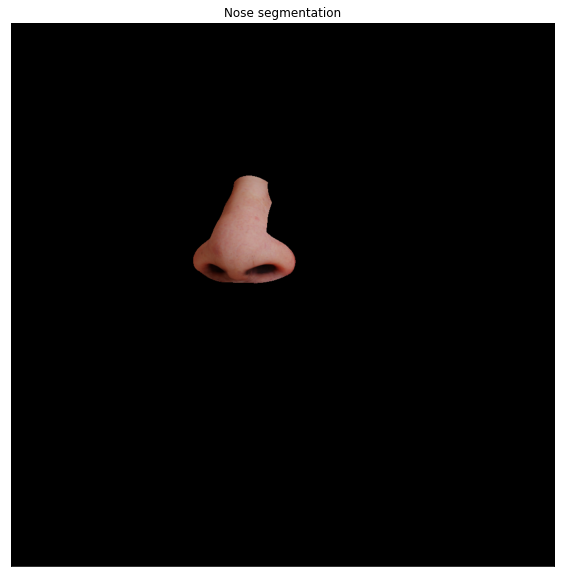

In [21]:
segment_img = dp.rgb_img.copy()
segment_img[~seg_mask] = 0

imshow(dp.rgb_img)
plt.title('Original image')
plt.figure()
imshow(segment_img)
plt.title('Nose segmentation')